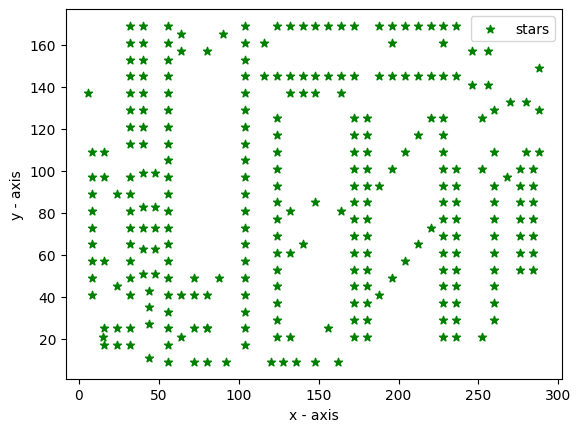

(288, 149) (288, 129) 20.0
(288, 149) (270, 133) 24.0832
(288, 149) (256, 141) 32.9848
(288, 149) (256, 157) 32.9848
(288, 149) (246, 157) 42.7551
(288, 149) (236, 169) 55.7136
(288, 149) (228, 169) 63.2456
(288, 149) (228, 161) 61.1882
(288, 149) (220, 169) 70.8802
(288, 149) (212, 169) 78.5875
(288, 149) (204, 169) 86.3481
(288, 149) (196, 169) 94.1488
(288, 149) (188, 169) 101.9804
(288, 149) (196, 161) 92.7793
(288, 149) (188, 145) 100.08
(288, 149) (172, 145) 116.0689
(288, 149) (164, 145) 124.0645
(288, 149) (156, 145) 132.0606
(288, 149) (148, 145) 140.0571
(288, 149) (140, 145) 148.054
(288, 149) (148, 169) 141.4214
(288, 149) (164, 169) 125.6025
(288, 149) (172, 169) 117.7115
(288, 149) (156, 169) 133.5066
(288, 149) (140, 169) 149.3452
(288, 149) (132, 169) 157.2768
(288, 149) (124, 169) 165.215
(288, 149) (116, 161) 172.4181
(288, 149) (104, 153) 184.0435
(288, 149) (104, 161) 184.3909
(288, 149) (104, 169) 185.0838
(288, 149) (90, 165) 198.6454
(288, 149) (80, 157) 208.1538

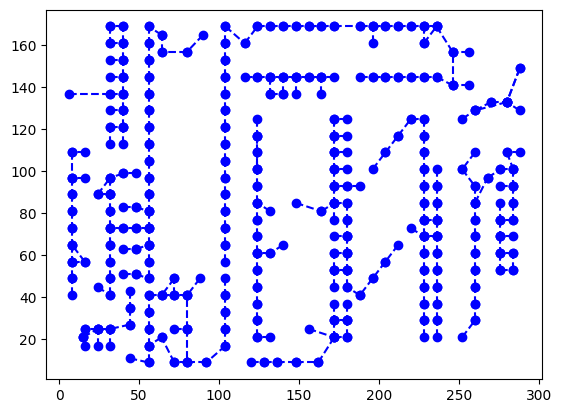

Cost of Travel is :  2510.882592097691

Route is : 
(288, 149) --> (280, 133) --> (288, 129) --> (280, 133) --> (270, 133) --> (280, 133) --> (256, 141) --> (246, 141) --> (256, 157) --> (246, 157) --> (246, 157) --> (236, 169) --> (236, 169) --> (228, 169) --> (228, 169) --> (228, 161) --> (228, 161) --> (236, 169) --> (220, 169) --> (228, 169) --> (212, 169) --> (220, 169) --> (204, 169) --> (212, 169) --> (196, 169) --> (204, 169) --> (188, 169) --> (196, 169) --> (196, 161) --> (196, 169) --> (188, 145) --> (196, 145) --> (172, 145) --> (164, 145) --> (164, 145) --> (156, 145) --> (156, 145) --> (148, 145) --> (148, 145) --> (140, 145) --> (140, 145) --> (132, 145) --> (148, 169) --> (156, 169) --> (164, 169) --> (172, 169) --> (172, 169) --> (188, 169) --> (156, 169) --> (164, 169) --> (140, 169) --> (148, 169) --> (132, 169) --> (140, 169) --> (124, 169) --> (132, 169) --> (116, 161) --> (124, 169) --> (104, 153) --> (104, 161) --> (104, 161) --> (104, 169) --> (104, 169) --> (11

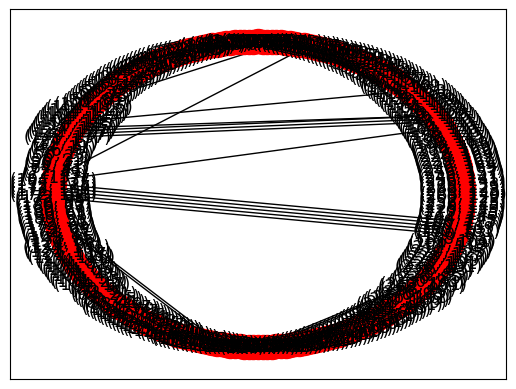

In [1]:
import matplotlib.pyplot as plt
import math
import networkx as nx


G = nx.Graph()
connected = []
cost = []
way = []


def plot(data):
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    # print(x, y)
    plt.scatter(x, y, label= "stars", color= "green",marker= "*")
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.legend()
    plt.show()


def euclidean_distance(data):

    for i in range(len(data)):
        G.add_node(data[i])
        temp = []
        temp2 = []
        for j in range(len(data)):

            flag = repeatededge(data[i], data[j])

            if flag == False:
                continue

            if i == j :
                continue

            elif(data[i] == data[j]):
                continue

            else:
                print(data[i], data[j],round(math.dist(data[i], data[j]),4))
                temp.append(data[i])
                temp.append(data[j])
                temp.append(math.dist(data[i], data[j]))
                temp2.append(math.dist(data[i], data[j]))

        if not temp:
           print(" ")
        elif not temp2:
            print(" ")
        else:
            vall = int(getmin_index(temp2))
            drawedges(vall, temp)
            drawedgesGraph(vall, temp)

    # print(data[0], data[-1], math.dist(data[0], data[-1]))
    finaledge(data[0], data[-1])
    drawnodes()


def repeatededge(node1, node2):
    if (G.has_edge(node1, node2) ):
        flag = False
        return flag
    return True


def finaledge(node1, node2):
    x_values = [node1[0], node2[0]]
    y_values = [node1[1], node2[1]]
    final = math.dist(node1, node2)
    cost.append(final)
    plt.plot(x_values, y_values, 'bo', linestyle="--")
    G.add_edge(node1, node2)
    plt.show()
    way.append(node1)
    travelcost(cost)


def drawedges(val, list):
    node1 = list[(3*val)-3]
    node2 = list[(3*val)-2]
    Weight = list[(3*val)-1]

    # print(f"node1 is {node1} node2 is {node2} cost is {cost}")
    G.add_edge(node1, node2, weight = Weight)

    cost.append(Weight)
    way.append(node1)
    way.append(node2)


def drawedgesGraph(val, list):
    node1 = list[(3*val)-3]
    node2 = list[(3*val)-2]

    x_values = [node1[0], node2[0]]
    y_values = [node1[1], node2[1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")


def drawnodes():
    pos = nx.circular_layout(G)
    nx.draw_networkx(G,pos=pos,with_labels=True,node_color = 'red')


def getmin_index(list):
    val = list.index(min(list))
    return val+1


def travelcost(Cost):
    print("Cost of Travel is : ",sum(Cost))
    route(way)


def route(way):

    i = 0
    print("\nRoute is : ")
    while i < len(way):
        print(way[i],end=" --> ")
        i = i+1


# data = [(1,1),(6,4),(1,4),(4,6),(6,1)]
data = [(288, 149), (288, 129), (270, 133), (256, 141), (256, 157), (246, 157),
        (236, 169), (228, 169), (228, 161), (220, 169), (212, 169), (204, 169),
        (196, 169), (188, 169), (196, 161), (188, 145), (172, 145), (164, 145),
        (156, 145), (148, 145), (140, 145), (148, 169), (164, 169), (172, 169),
        (156, 169), (140, 169), (132, 169), (124, 169), (116, 161), (104, 153),
        (104, 161), (104, 169), (90, 165), (80, 157), (64, 157), (64, 165),
        (56, 169), (56, 161), (56, 153), (56, 145), (56, 137), (56, 129),
        (56, 121), (40, 121), (40, 129), (40, 137), (40, 145), (40, 153),
        (40, 161), (40, 169), (32, 169), (32, 161), (32, 153), (32, 145),
        (32, 137), (32, 129), (32, 121), (32, 113), (40, 113), (56, 113),
        (56, 105), (48, 99), (40, 99), (32, 97), (32, 89), (24, 89),
        (16, 97), (16, 109), (8, 109), (8, 97), (8, 89), (8, 81),
        (8, 73), (8, 65), (8, 57), (16, 57), (8, 49), (8, 41),
        (24, 45), (32, 41), (32, 49), (32, 57), (32, 65), (32, 73),
        (32, 81), (40, 83), (40, 73), (40, 63), (40, 51), (44, 43),
        (44, 35), (44, 27), (32, 25), (24, 25), (16, 25), (16, 17),
        (48, 51), (56, 57), (56, 65), (48, 63), (48, 73), (56, 73),
        (56, 81), (48, 83), (56, 89), (56, 97), (104, 97), (104, 105),
        (104, 113), (104, 121), (104, 129), (104, 137), (104, 145), (116, 145),
        (124, 145), (132, 145), (132, 137), (140, 137), (148, 137), (15,21),
        (24, 17), (32, 17), (44, 11), (56, 9), (56, 17), (56, 25),
        (56, 33), (56, 41), (64, 41), (72, 41), (72, 49), (56, 49),(6, 137),
        (164, 137), (172, 125), (172, 117), (172, 109), (172, 101), (172, 93),
        (172, 85), (180, 85), (180, 77), (180, 69), (180, 61), (180, 53),
        (172, 53), (172, 61), (172, 69), (172, 77), (164, 81), (148, 85),
        (124, 85), (124, 93), (124, 109), (124, 125), (124, 117), (124, 101),
        (104, 89), (104, 81), (104, 73), (104, 65), (104, 49), (104, 41),
        (104, 33), (104, 25), (104, 17), (92, 9), (80, 9), (72, 9),
        (64, 21), (72, 25), (80, 25), (80, 25), (80, 41), (88, 49),
        (104, 57), (124, 69), (124, 77), (132, 81), (140, 65), (132, 61),
        (124, 61), (124, 53), (124, 45), (124, 37), (124, 29), (132, 21),
        (124, 21), (120, 9), (128, 9), (136, 9), (148, 9), (162, 9),
        (156, 25), (172, 21), (180, 21), (180, 29), (172, 29), (172, 37),
        (172, 45), (180, 45), (180, 37), (188, 41), (196, 49), (204, 57),
        (212, 65), (220, 73), (228, 69), (228, 77), (236, 77), (236, 69),
        (236, 61), (228, 61), (228, 53), (236, 53), (236, 45), (228, 45),
        (228, 37), (236, 37), (236, 29), (228, 29), (228, 21), (236, 21),
        (252, 21), (260, 29), (260, 37), (260, 45), (260, 53), (260, 61),
        (260, 69), (260, 77), (276, 77), (276, 69), (276, 61), (276, 53),
        (284, 53), (284, 61), (284, 69), (284, 77), (284, 85), (284, 93),
        (284, 101), (288, 109), (280, 109), (276, 101), (276, 93), (276, 85),
        (268, 97), (260, 109), (252, 101), (260, 93), (260, 85), (236, 85),
        (228, 85), (228, 93), (236, 93), (236, 101), (228, 101), (228, 109),
        (228, 117), (228, 125), (220, 125), (212, 117), (204, 109), (196, 101),
        (188, 93), (180, 93), (180, 101), (180, 109), (180, 117), (180, 125),
        (196, 145), (204, 145), (212, 145), (220, 145), (228, 145), (236, 145),
        (246, 141), (252, 125), (260, 129), (280, 133)]
plot(data)
euclidean_distance(data)
